# HEALTH CARE DIABETES CHALLENGE

Context
Diabetes Mellitus is an endocrine disease of importance, with it multiple comorbidities and complication soccuring due to the bodies inability to manage its glucose level efficiently, It is characterized by varying levels of Insulin intolerance or deficit.
The types of Diabetes Mellitus(DM) occurence include
1. Type 1 DM
2. Type 2 DM
3. Gestatational DM

Gestational Diabetes Melitus describes when a pregnant woman experiences any form of glucose intolerance with its first occurrence in pregnancy, this has notable risk to the mother and foetus and thus, the increased of Diabetes during pregnancy must be predicted and thus managed effectively to prevent mortality and other severe morbidities.

Objectives
  - To explore factors that contribute increased Diabetes incidence in pregnancy
  - To explore health factors that can be used to most effectively predict Diabetes risk
  

Problem Statment
  - To create a supervised learning, classification model that accurately predicts the risk for diabetes.

Dataset
- The data used was sourced secondarily  [Dataset](https://drive.google.com/drive/folders/1ubaqsATGLf0PvDxCgT7nQBl_4_2oehVG?usp=sharing)
####Columns:
1. Id: Unique identifier for each data entry.
2. Pregnancies: Number of times pregnant.
3. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4. BloodPressure: Diastolic blood pressure (mm Hg).
5. SkinThickness: Triceps skinfold thickness (mm).
6. Insulin: 2-Hour serum insulin (mu U/ml).
7. BMI: Body mass index (weight in kg / height in m^2).
8. DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
9. Age: Age in years.
10. Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.




### Importing Libraries

In [ ]:
# Data manipulations and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from google.colab import files

import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [ ]:
# Run this code to load dataset downloaded on the system

uploaded = files.upload()

In [ ]:
# Read the dataset into dataframe
data = pd.read_csv('Healthcare-Diabetes.csv')

data.head() # Check 5 first rows

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(data.shape)

(2768, 10)


**Observation**
- There are 10 columns and 2,768 rows in the dataset

In [ ]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observation**
- There're is no missing value in the dataset.


### Understand dataset

In [ ]:
# To view concise information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


**Observation**
-  Outcome is our dependent variable and variable of interest in the dataset.
- BMI and DiabetesPedigreeFunction are float64 numeric data types and the other 7 variables are int64 numeric data type


Summary statistics of our variables -all being numerical

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


**Observation**
- The minimum value of 0 recorded in many columns such as BloodPressure, Glucose, and BMI of shows there are incorrectly filled values, as this doesn't occur.

- The mean BMI of 32, which is an obese class 2 range Body Mass Index shows an error in data values or demonstrate that participants in the data collected are majorly in the overweight and obese Body mass Index ranges.

- The mean age is 33 years, with the youngest being 21 and the oldest participant being 81 years old, half of the participants are lesser than 30 years of age.

- The normal 2-Hour serum insulin (mu U/ml)levels ranges from 16-166 mIU/L, a minimum and 25 percentile value of 0.0,indicates erorrs in the dataset.

- The minimum and 25 percentile triceps skinfold thickness (mm) of 0.0 also for the age range of respondents also indicates error

### Univariate Analysis

In [ ]:
columns = data.columns
columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Let's observe the `outcome` variable

In [ ]:
data['Outcome']

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [ ]:
set(data['Outcome']) # To check the unique values in the column

{0, 1}

In [ ]:
#set(data['Id'])


**Observation**
- The Id column with 2768 rows contains 2768 unique numbers, showing it is a unique identifier and should be dropped.

In [ ]:
data.drop('Id', axis = 1, inplace=True)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(2768, 9)

In [ ]:
print(columns)

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Lets check for outliers and duplicates to correct the  value error in our datset columns

In [ ]:
# check for duplicate values
data.duplicated().sum()

1990

**Observation**
- There are 1990 duplicates in the dataset


In [ ]:
# drop dupliates
data.drop_duplicates(inplace=True)


In [ ]:
data.shape

(778, 9)

**Observation**
- The data has reduced to 778 rows

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# sort the BloodPressure variable to view the minimum values

data['BloodPressure'].sort_values().head(20)

2336    0
426     0
430     0
435     0
357     0
494     0
81      0
78      0
697     0
300     0
703     0
484     0
706     0
468     0
60      0
332     0
347     0
49      0
269     0
453     0
Name: BloodPressure, dtype: int64

**Observations**
- It appears there are a good number of 0 values in the BloodPressure column, which is certainly an error value


Try to drop the zeros values

In [ ]:
data['Outcome'].unique()

array([1, 0])

In [ ]:
data.shape

(778, 9)

Create a function to plot the Box Plot and Histogram of each variable distribution

In [ ]:

def plot_boxplot_hist(variable):
    # Set up the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot histogram
    sns.histplot(data[variable], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {variable}')

    # Plot vertical boxplot
    sns.boxplot(y=data[variable], ax=axes[1], color='salmon')
    axes[1].set_title(f'Vertical Boxplot of {variable}')
    #Add the text label

    # Adjust layout
    plt.tight_layout()
    plt.show()

####Pregnancies

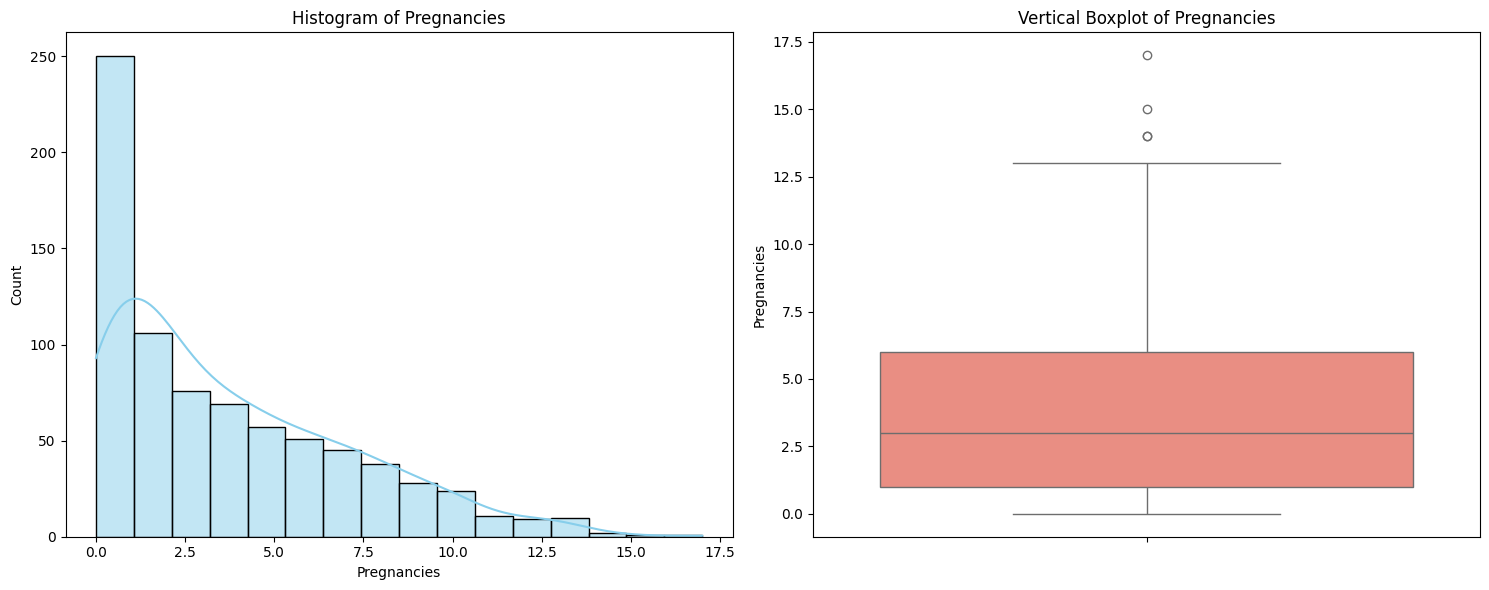

In [ ]:
# Plot Distibution of Pregnancies
plot_boxplot_hist('Pregnancies')


**Observation**
- Pregnancies variable is not normally distributed, The histogram is rightly skewed with marked outliers above the maximum of the box plot with values ranging 0 up to women with 17 number of times pregnant.

-

####Glucose

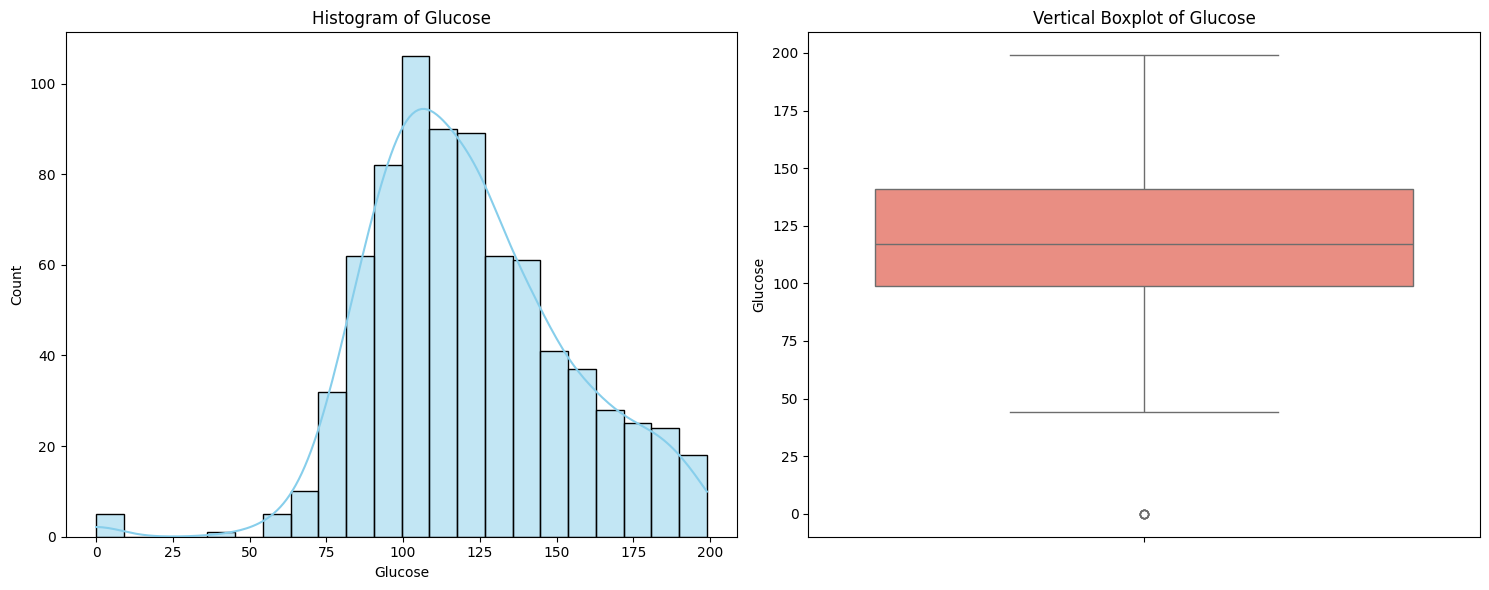

In [ ]:
# Plot Distibution of Glucose
plot_boxplot_hist('Glucose')


**Observation**


####BloodPressure

- The blood pressure is observed to be left shewed, with some  blood pressure values shown as 0.0

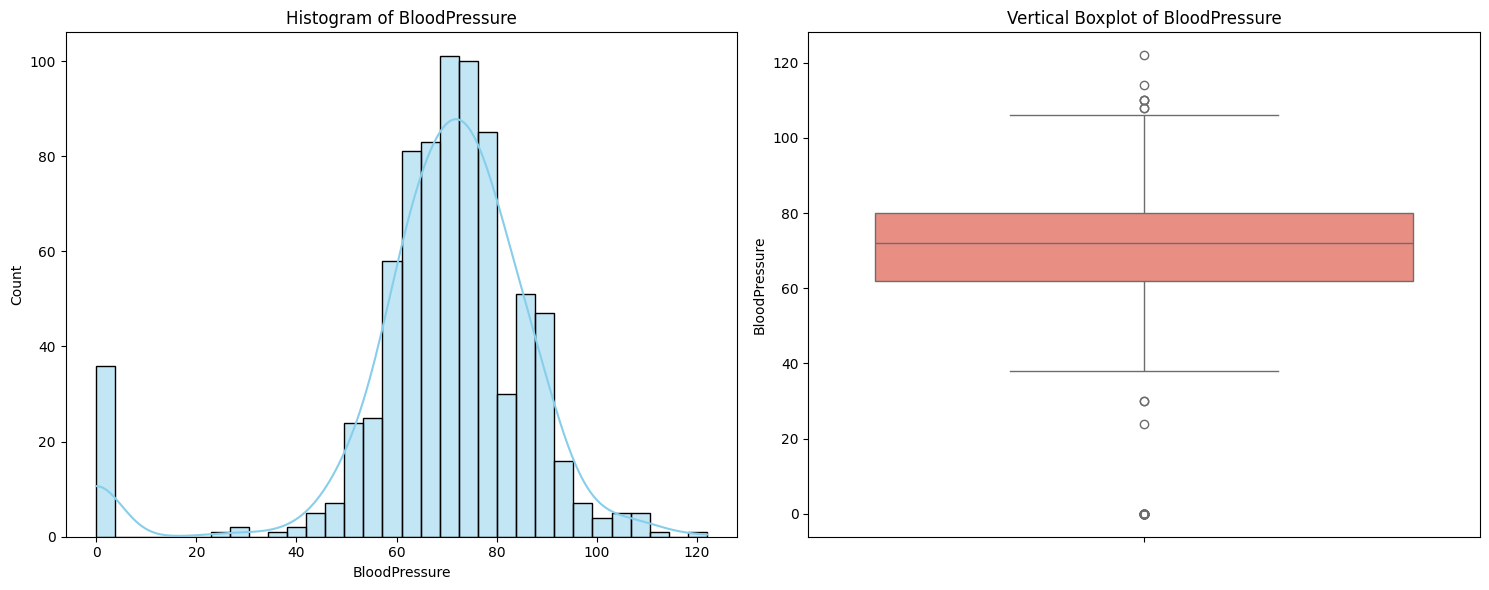

In [ ]:
# Plot Distibution of BloodPressure
plot_boxplot_hist('BloodPressure')


**Observation**
- The BloodPressure appears normally distributed


####SkinThickness'

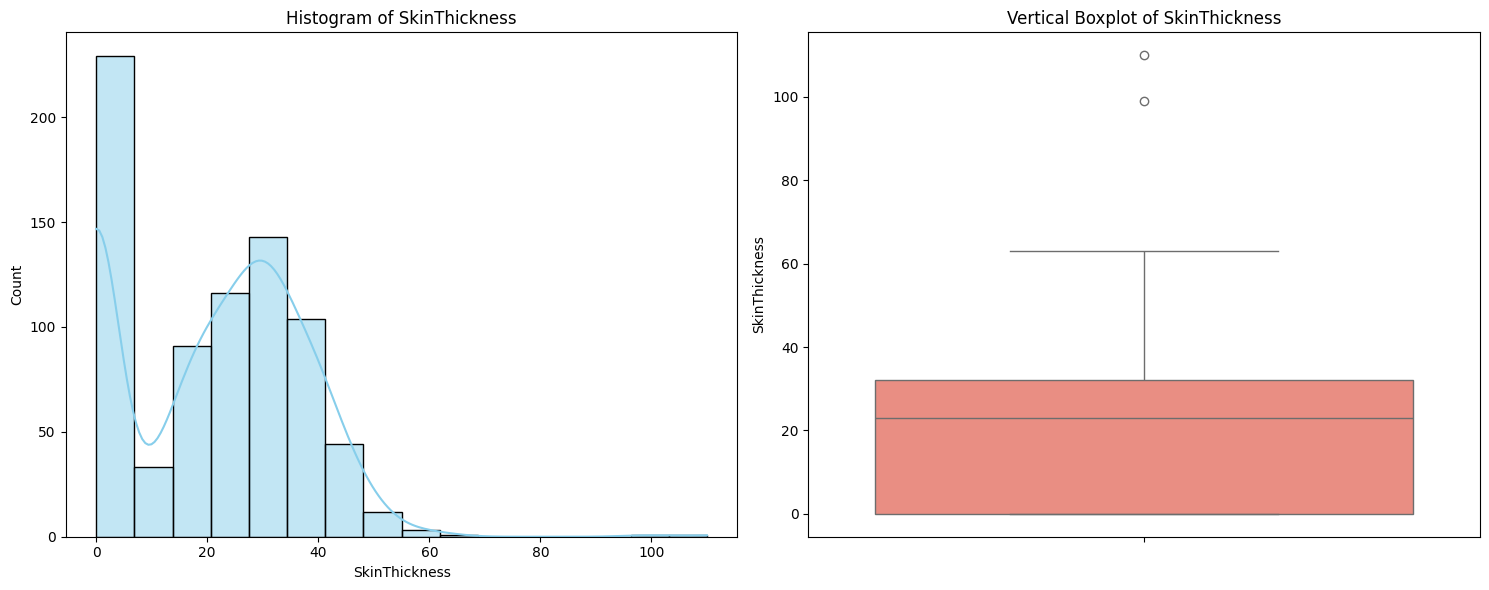

In [ ]:
## Plot Distibution of SkinThickness
plot_boxplot_hist('SkinThickness')


**Observation**
- SkinThickness appears normally distributed

####Insulin


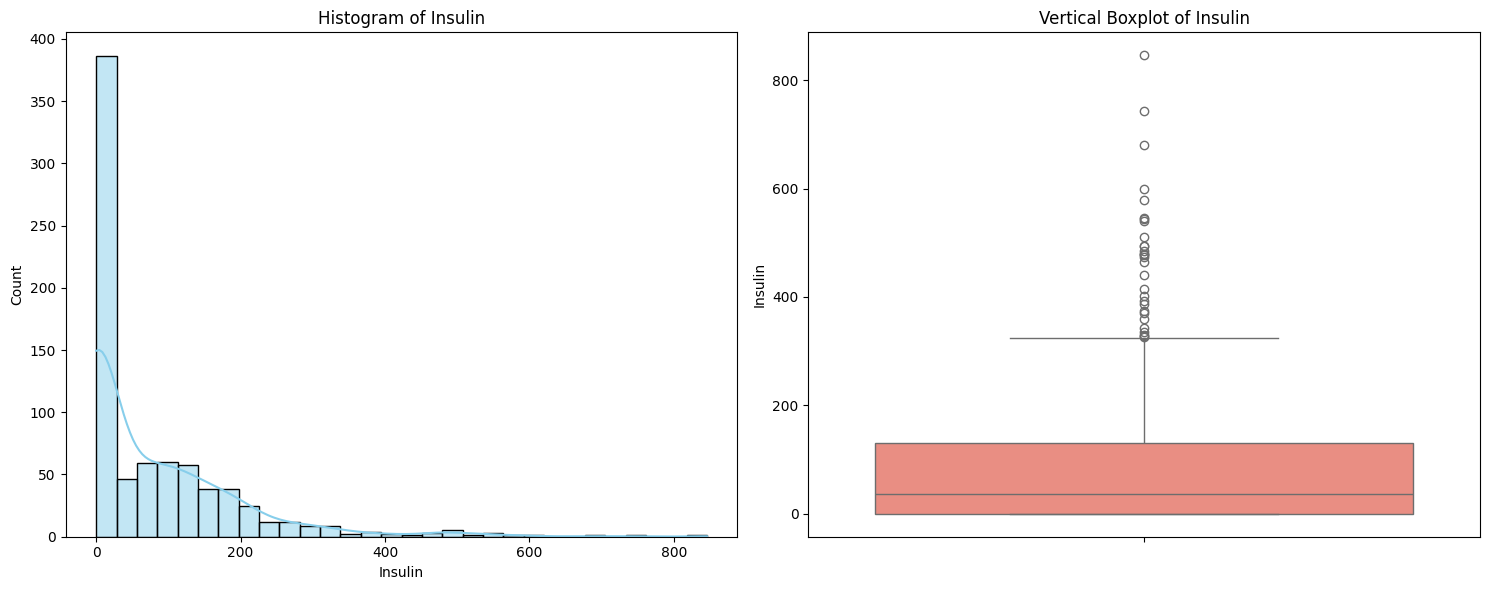

In [ ]:
# Plot Distibution of Insulin
plot_boxplot_hist('Insulin')


**Observation**
- Insulin appears normally distributed

####BMI

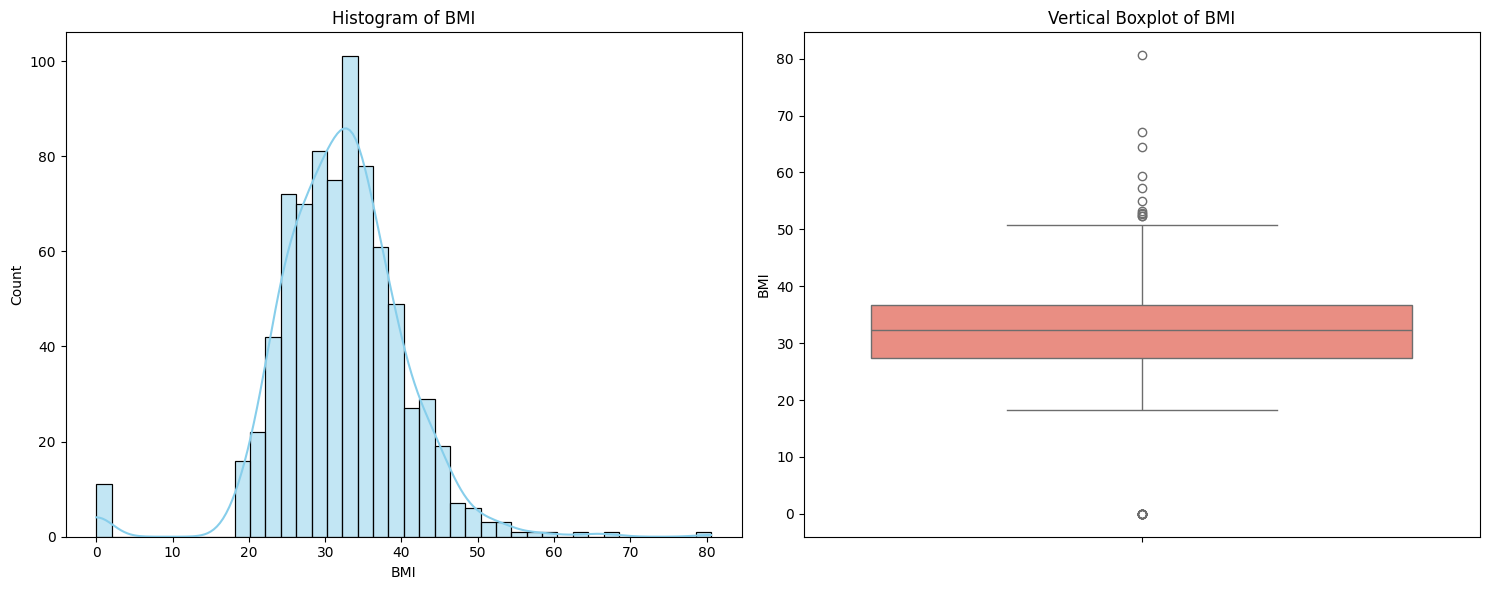

In [ ]:
# Plot Distibution of BMI
plot_boxplot_hist('BMI')


**Observation**
- BMI appears rightly skewed with outlier values in the upper part of the boxplot

####DiabetesPedigreeFunction

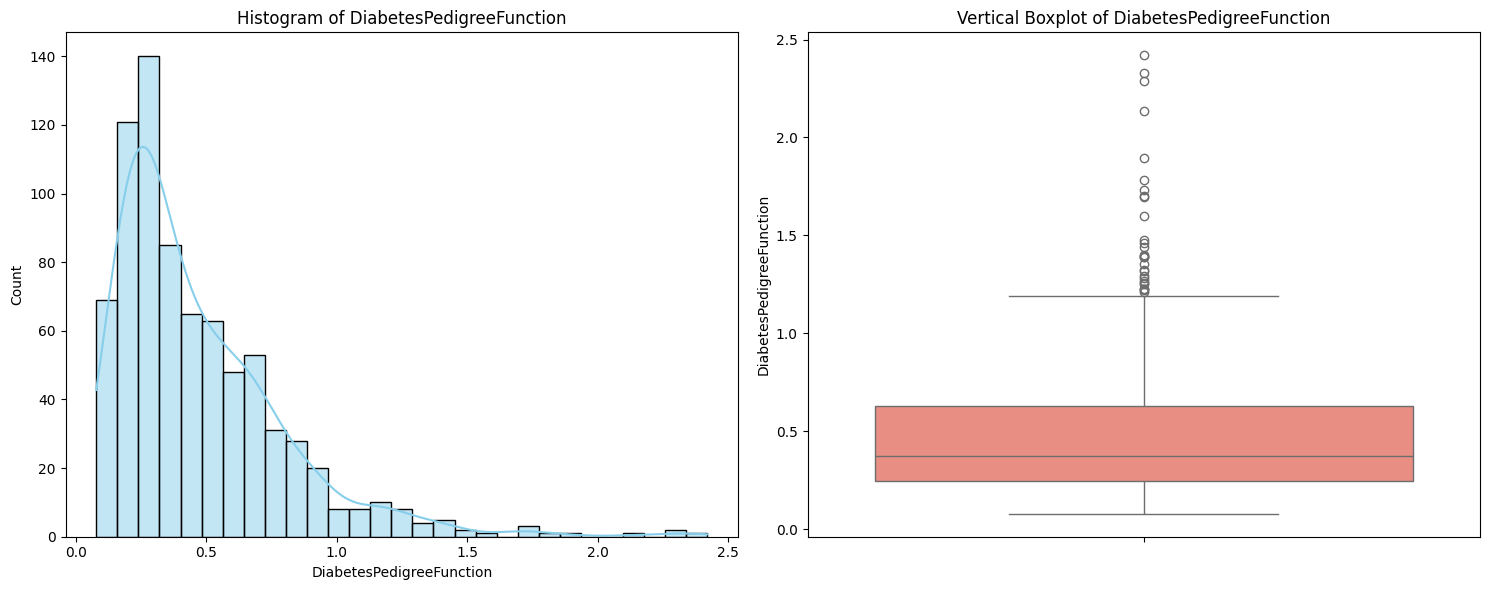

In [ ]:
# Plot Distibution of DiabetesPedigreeFunction
plot_boxplot_hist('DiabetesPedigreeFunction')


**Observation**
- DiabetesPedigreeFuction appears rightly skewed

####Age

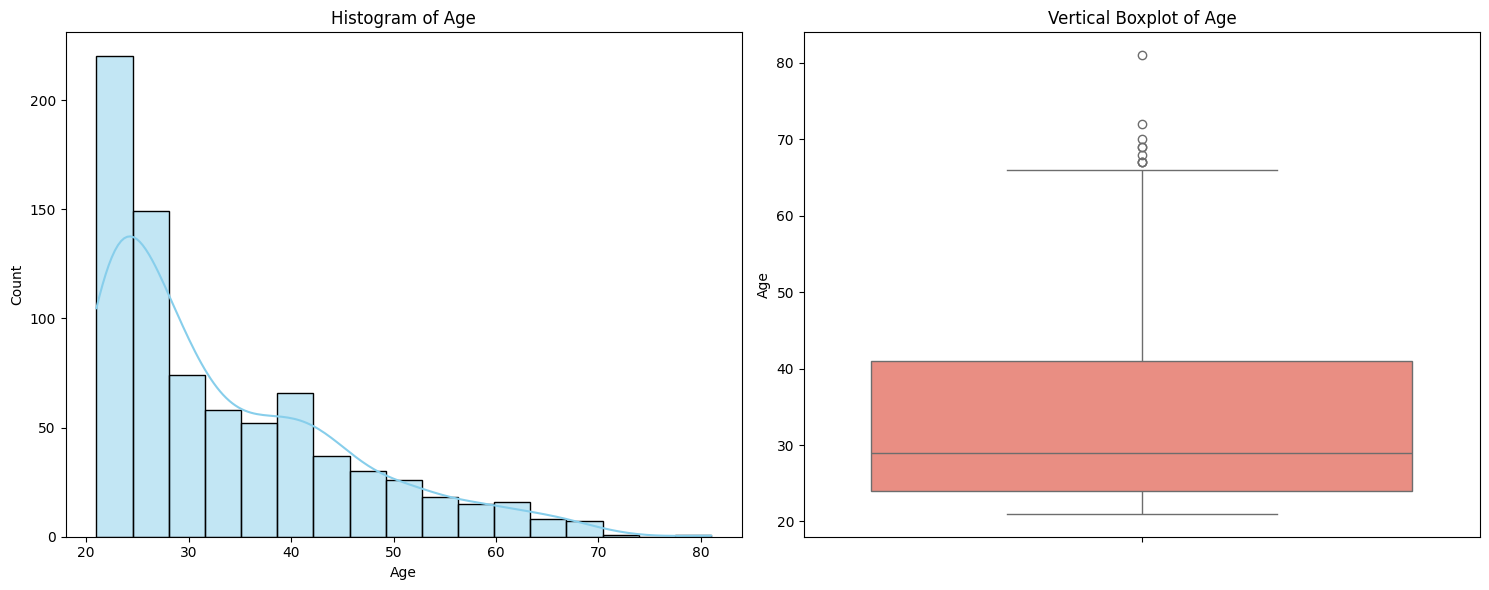

In [ ]:
# Plot Distibution of Age
plot_boxplot_hist('Age')

**Observation**
- The age is rightly skewed

###Bivariate Analysis

Let us explore the relationship between the dependent variable 'Outcome; and the other independent variables

<Figure size 1600x800 with 0 Axes>

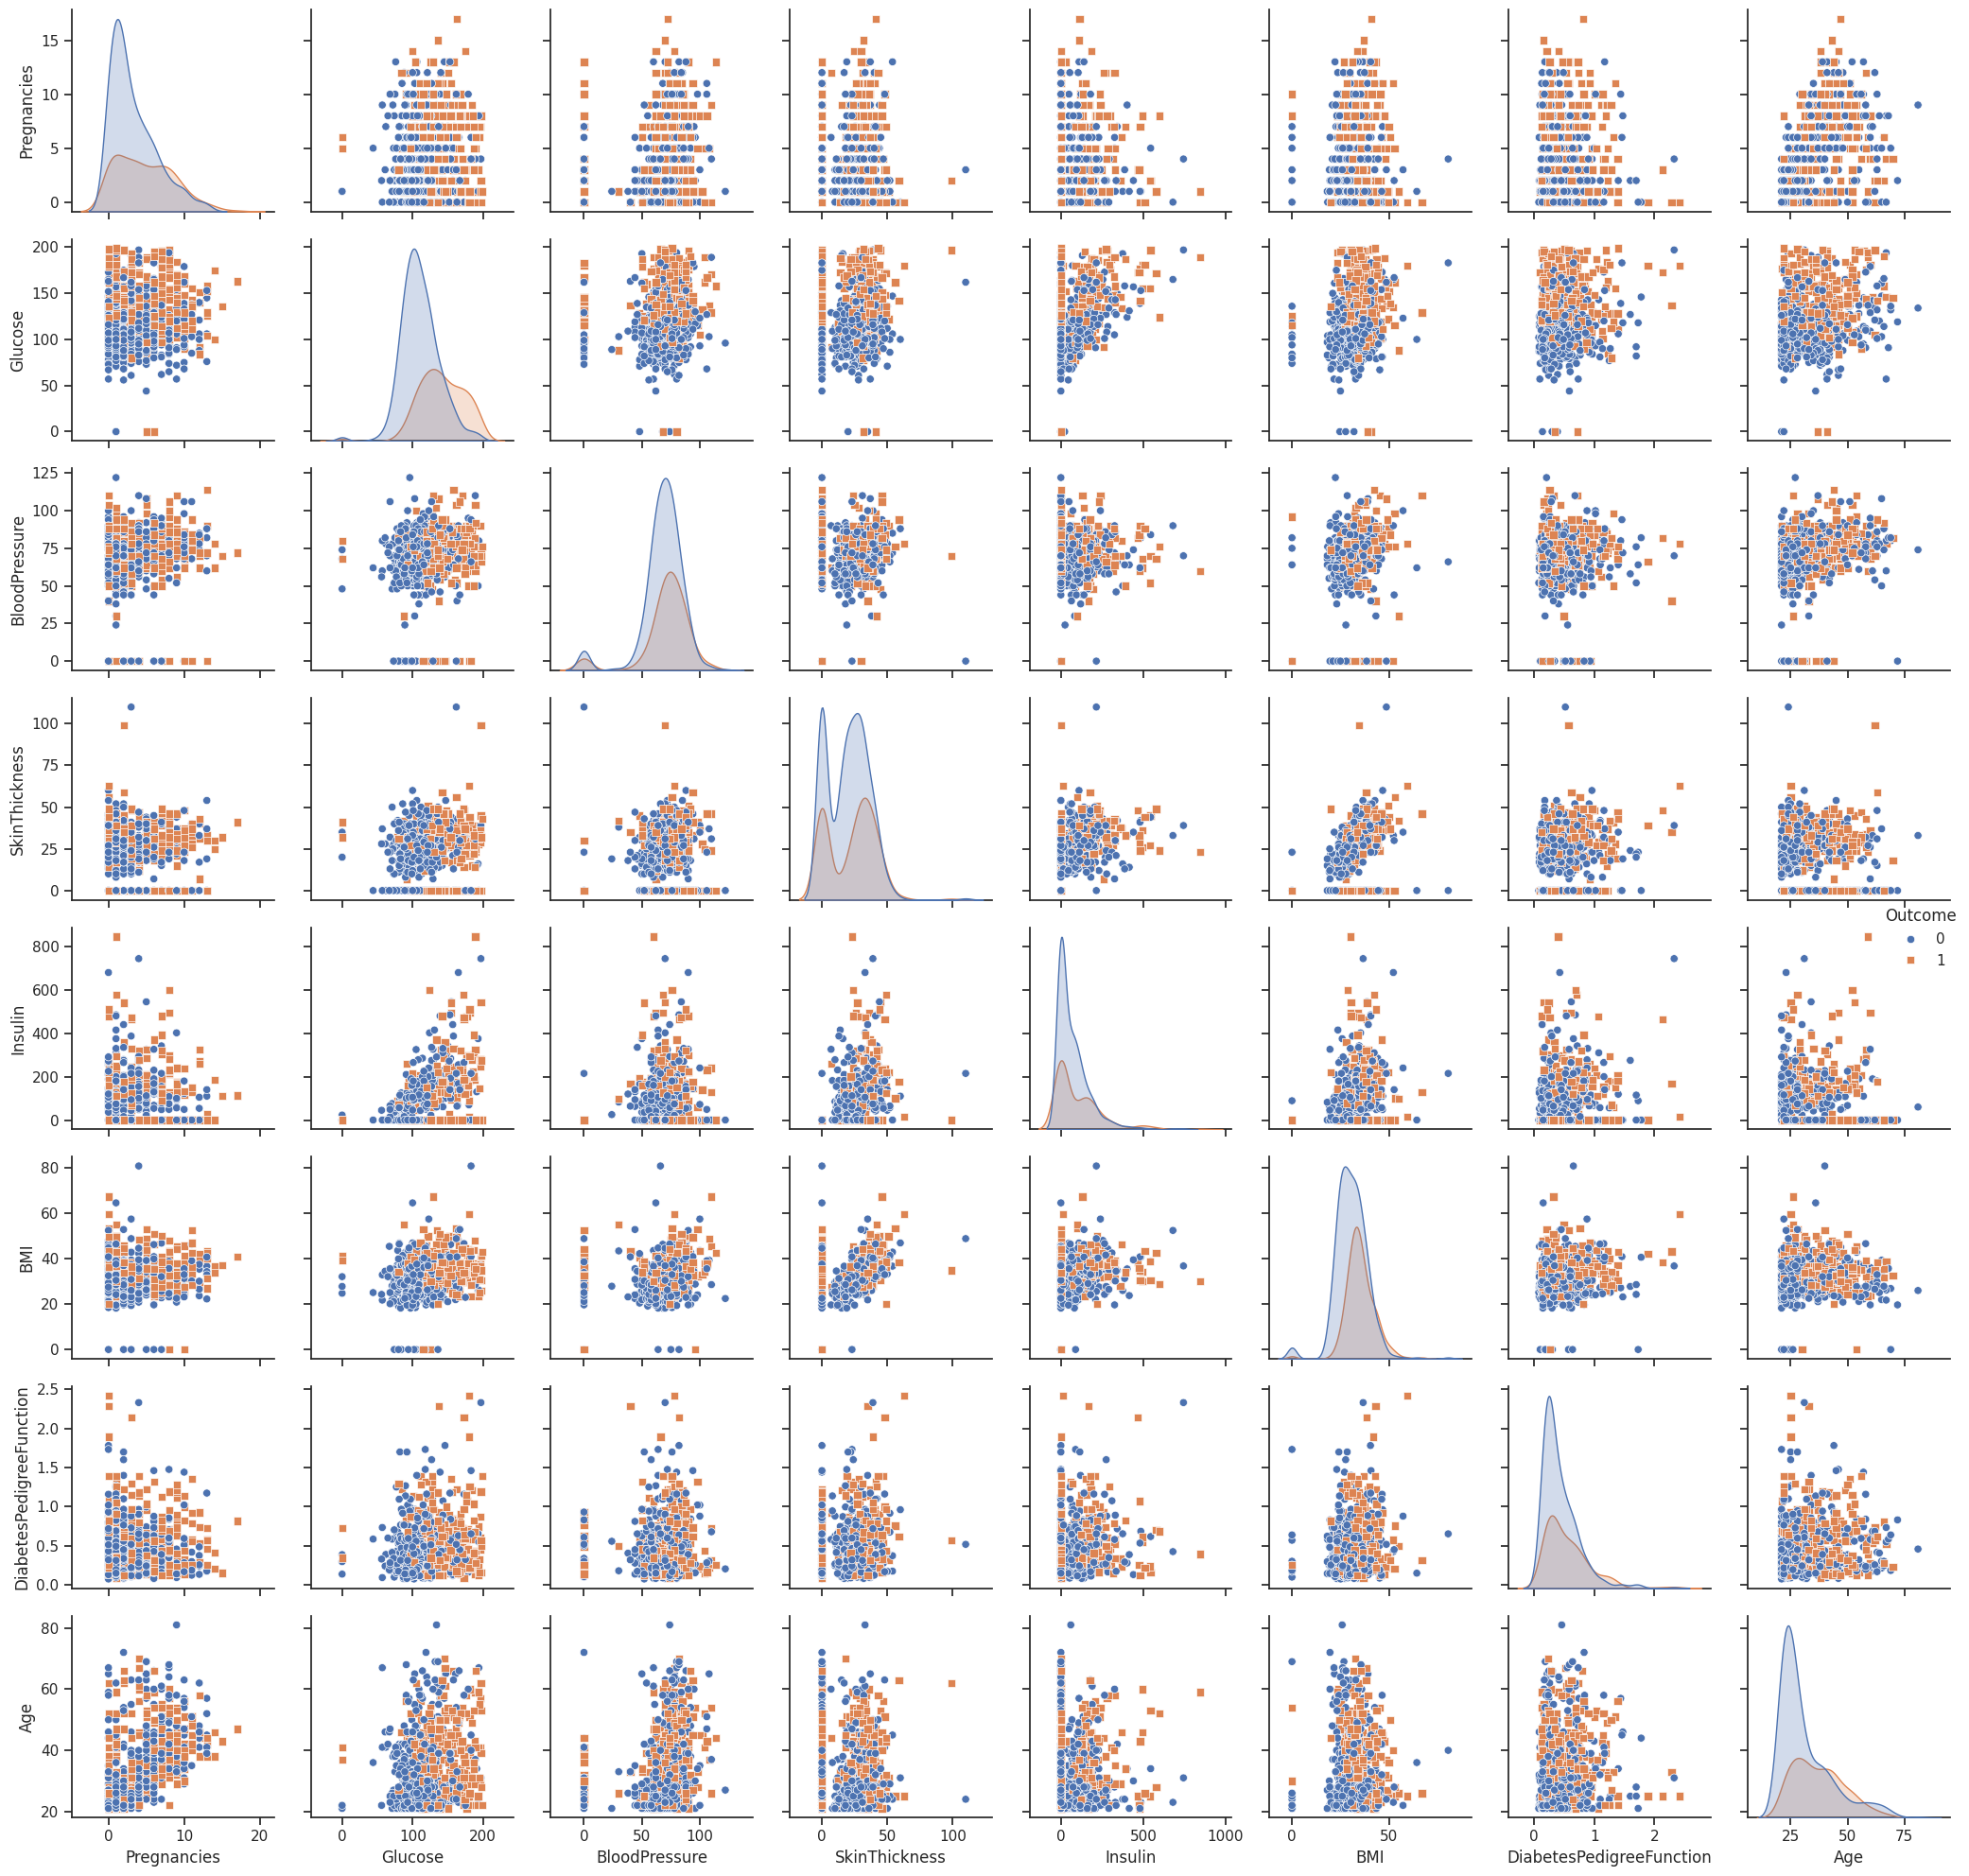

In [ ]:
# Bivariate Analysis: Subplots of 'Outcome' with all other variables
plt.figure(figsize=(16, 8))
sns.set(style="ticks")

# Specify the 'Outcome' variable as hue to create different colors for different outcomes
sns.pairplot(data, hue='Outcome', diag_kind='kde', markers=["o", "s"])#, palette="Rdbu")

# Adjust layout
plt.tight_layout()
plt.show()

**Observation**

1 .



####Multivariate Analysis

<Figure size 1700x20000 with 0 Axes>

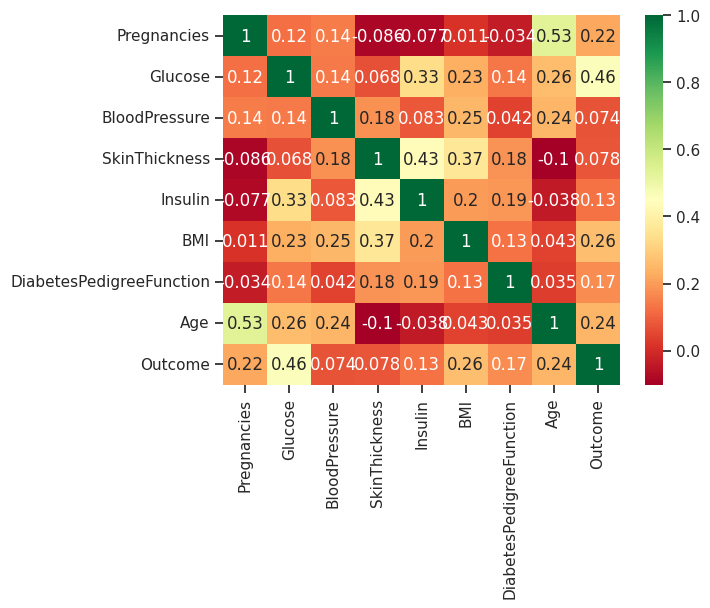

<Figure size 1700x20000 with 0 Axes>

In [ ]:
# Plot the correlation matrix of all columns
corr = data.corr()
sns.heatmap(corr,annot =True,cmap='RdYlGn')

plt.figure(figsize=(17,200))

**Observation**

**SUMMARY OF EXPLORATORY DATA ANALYSIS**

### Feature Engineering

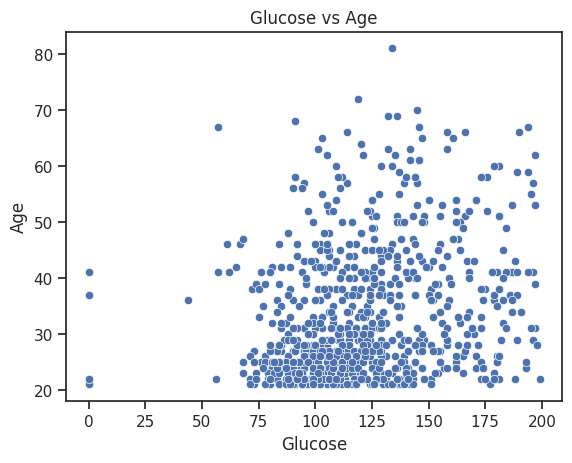

In [ ]:
def plot_feat1_feat2(feat1, feat2):
    sns.scatterplot(x=feat1, y=feat2, data=data)
    plt.title(f'{feat1} vs {feat2}')
    plt.show()

# Calling the function
plot_feat1_feat2('Glucose', 'Age')

This graph simply shows the coorelation between the Age and Glucose column.

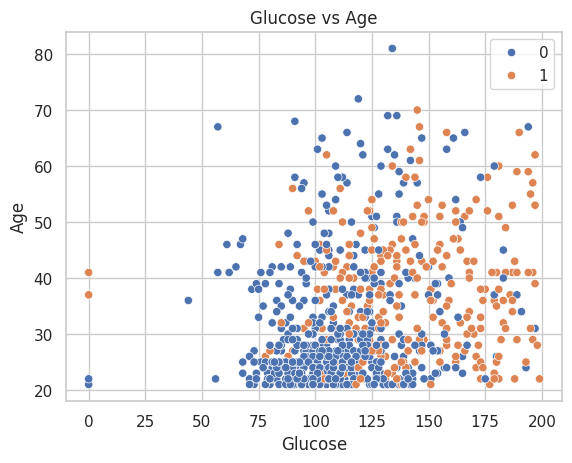

In [ ]:

def plot_feat1_feat2(feat1, feat2, data):
    # Assuming 'Outcome' is the column indicating diabetic (1) or healthy (0) outcomes
    sns.set(style="whitegrid")

    # scatter plot for diabetic outcomes (Outcome=1)
    sns.scatterplot(x=feat1, y=feat2, data=data, hue="Outcome")

    # scatter plot for healthy outcomes (Outcome=0)
    #sns.scatterplot(x=feat1, y=feat2, data=data[data['Outcome'] == 0], color='green', alpha=0.7, label='Healthy')


    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title(f'{feat1} vs {feat2}')


    plt.legend()


    plt.show()


plot_feat1_feat2('Glucose', 'Age', data)


Healthy persons are concentrate with an age <= 30 and with glucose level of <= 150


plot_feat1_feat2('Glucose','Age')

Scaling Data


In [ ]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data["Outcome"].value_counts()

0    506
1    272
Name: Outcome, dtype: int64

In [ ]:
X = data.drop('Outcome', axis = 1)
y = data["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

### Modelling

In [ ]:
def make_predictions(model):
    model.fit(scaledX_train, y_train)
    train_pred = model.predict(scaledX_train)
    test_pred = model.predict(scaledX_test)
    train_score = f1_score(y_train, train_pred)
    test_score = f1_score(y_test, test_pred)
    report = classification_report(y_test, test_pred)
    return train_score, test_score, report

In [ ]:
log = LogisticRegression()

In [ ]:
log_train_score, log_test_score, log_report = make_predictions(log)

In [ ]:
log_test_score

0.6458333333333333

In [ ]:
print(log_report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       101
           1       0.76      0.56      0.65        55

    accuracy                           0.78       156
   macro avg       0.77      0.73      0.74       156
weighted avg       0.78      0.78      0.77       156



In [ ]:
forest = RandomForestClassifier(random_state=0)
forest_train_score, forest_test_score, forest_report = make_predictions(forest)

In [ ]:
forest_test_score

0.6407766990291262

In [ ]:
print(forest_report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       101
           1       0.69      0.60      0.64        55

    accuracy                           0.76       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.76      0.76      0.76       156



In [ ]:
boost = XGBClassifier(random_state=7)
boost_train_score, boost_test_score, boost_report = make_predictions(boost)

In [ ]:
print(boost_report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       101
           1       0.69      0.64      0.66        55

    accuracy                           0.77       156
   macro avg       0.75      0.74      0.74       156
weighted avg       0.77      0.77      0.77       156



#### Tuning the RF model

In [ ]:
param_dist ={'n_estimators': range(80, 500, 20),
             'max_depth': range(0, 12, 1),
             'min_samples_split': range(0, 30, 5),
             'max_features': ['auto', 'sqrt', 'log2', None],
             "bootstrap":[True, False]}

kfold_forest = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
random_search = RandomizedSearchCV(
    forest,
    param_distributions=param_dist,
    n_iter=50,
    cv=kfold_forest,
    scoring="accuracy",
    n_jobs=-1,
    random_state=6
)

random_search.fit(scaledX_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(0, 12),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': range(0, 30, 5),
                                        'n_estimators': range(80, 500, 20)},
                   random_state=6, scoring='accuracy')

In [ ]:
random_search.best_params_

{'n_estimators': 80,
 'min_samples_split': 15,
 'max_features': None,
 'max_depth': 3,
 'bootstrap': True}

In [ ]:
tuned_forest = random_search.best_estimator_
tforest_train_score, tforest_test_score, tforest_report = make_predictions(tuned_forest)

In [ ]:
tforest_test_score

0.6530612244897959

In [ ]:
print(tforest_report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       101
           1       0.74      0.58      0.65        55

    accuracy                           0.78       156
   macro avg       0.77      0.74      0.75       156
weighted avg       0.78      0.78      0.77       156



#### Tuning the Xgboost model

In [ ]:
params = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1],
    "max_depth": range(2, 21, 3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lamda":[1e-5, 1e-2, 0.1, 1, 10, 100]
}

In [ ]:
random_search_boost = RandomizedSearchCV(
    boost,
    param_distributions=params,
    n_iter=48,
    cv=kfold_forest,
    scoring="accuracy",
    n_jobs=-1,
    random_state=7
)

random_search_boost.fit(scaledX_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importanc...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=7, ...),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(2, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lamda': [1e-05, 0.01, 0.1, 1, 10,
                                                      100]},
                   random_state=7, scoring='accuracy')

In [ ]:
random_search_boost.best_params_

{'reg_lamda': 1e-05,
 'reg_alpha': 10,
 'max_depth': 20,
 'learning_rate': 1,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [ ]:
tuned_boost = random_search_boost.best_estimator_
tboost_train_score, tboost_test_score, tboost_report = make_predictions(tuned_boost)

In [ ]:
tboost_test_score

0.6666666666666666

### Model Evaluation

In [ ]:
scores_df = pd.DataFrame([["Random Forest (without tuning)", forest_train_score, forest_test_score],
                         ["Xgboost (without tuning)", boost_train_score, boost_test_score],
                         ["Xgboost (tuned)", tboost_train_score, tboost_test_score],
                         ["Random Forest (tuned)", tforest_train_score, tforest_test_score]],
                         columns = ["Model", "Training score", "Validation score"])

In [ ]:
scores_df

,Model,Training score,Validation score
0,Random Forest (without tuning),1.000000,0.640777
1,Xgboost (without tuning),1.000000,0.660377
2,Xgboost (tuned),0.675192,0.666667
3,Random Forest (tuned),0.642105,0.653061


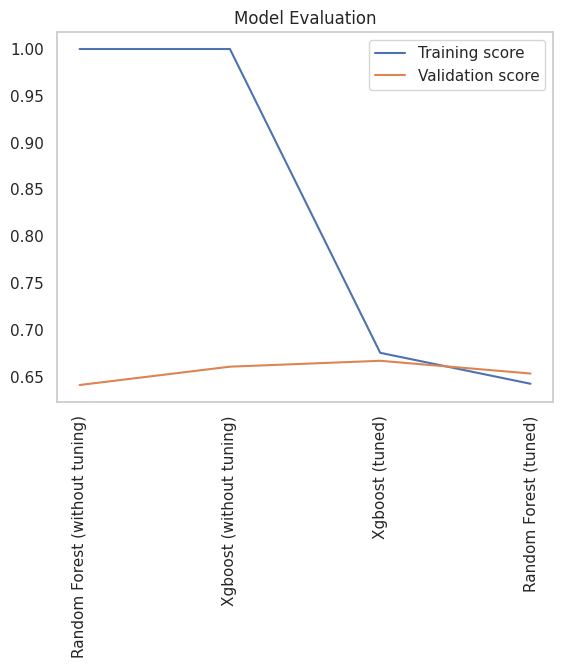

In [ ]:
plt.plot(scores_df["Model"], scores_df["Training score"])
plt.plot(scores_df["Model"], scores_df["Validation score"])

plt.grid(False)
plt.xticks(rotation=90)
plt.title("Model Evaluation")
plt.legend(['Training score', 'Validation score'])
plt.show()

The models were evaluated based on the f1_score metric due to imbalance of target classes. From the plot above, the random forest model has proven to be the best model with no form of overfitting.

### Feature Importance

In [ ]:
importance = list(tuned_forest.feature_importances_)
feature = list(X_train.columns)
feature_importance = list(zip(feature, importance))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance']).sort_values(ascending = False, by= 'Importance')
feature_importance_df

,Feature,Importance
1,Glucose,0.601336
5,BMI,0.162897
7,Age,0.115428
6,DiabetesPedigreeFunction,0.061665
0,Pregnancies,0.023828
4,Insulin,0.020881
2,BloodPressure,0.008794
3,SkinThickness,0.005171


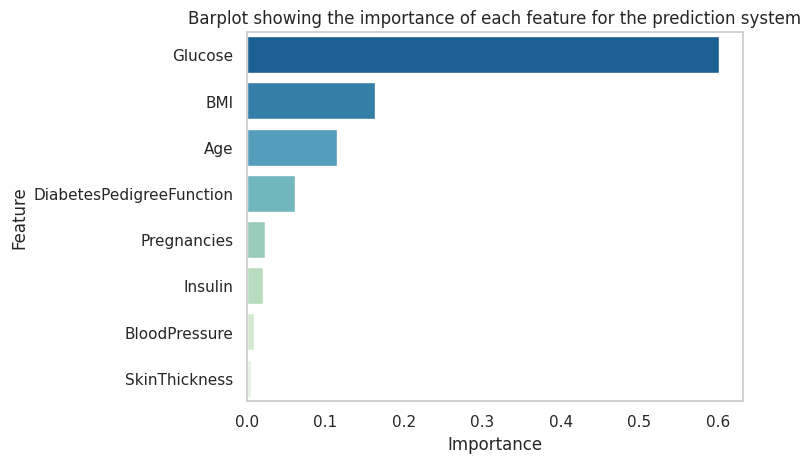

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='GnBu_r')
plt.title('Barplot showing the importance of each feature for the prediction system')

plt.grid(False)
plt.show()

Glucose level of an individual has the highest influence on the diabetic status of an individual, followed closely by the BMI and Age